In [ ]:
import pdfplumber
import pandas as pd

def pdf_to_csv(pdf_path, csv_path):
    data = []

    with pdfplumber.open(pdf_path) as pdf:
        for i, page in enumerate(pdf.pages):
            text = page.extract_text()
            if text:
                data.append([i+1, text])  # Storing page number and text

    # Creating DataFrame and saving to CSV
    df = pd.DataFrame(data, columns=["Page Number", "Text"])
    df.to_csv(csv_path, index=False, encoding='utf-8')

    print(f"CSV file saved at {csv_path}")

# Example Usage
pdf_to_csv("input.pdf", "output.csv")


CSV file saved at output.csv


In [ ]:
import pdfplumber
import pandas as pd
import re

def extract_text_from_pdf(pdf_path):
    data = []
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text = page.extract_text()
            if text:
                lines = text.split("\n")
                data.extend(lines)
    return data

def clean_and_structure_data(data):
    structured_data = []
    temp_row = []
    for line in data:
        if re.match(r'^\s*$', line):  # Skip empty lines
            continue
        if is_new_record(line):  # Check if a new record starts
            if temp_row:
                structured_data.append(temp_row)
            temp_row = [line]
        else:
            temp_row.append(line)  # Append to the previous record

    if temp_row:  # Add last record
        structured_data.append(temp_row)

    return structured_data

def is_new_record(line):
    # Adjust this condition based on how new categories are identified in your PDF
    return bool(re.match(r'^[A-Z]+', line))  # Example: Categories start with uppercase letters

def save_to_csv(data, output_csv):
    df = pd.DataFrame(data)
    df.to_csv(output_csv, index=False, header=False)

if __name__ == "__main__":
    pdf_path = "input.pdf"  # Change this to your PDF file path
    output_csv = "output.csv"

    raw_data = extract_text_from_pdf(pdf_path)
    structured_data = clean_and_structure_data(raw_data)
    save_to_csv(structured_data, output_csv)

    print(f"CSV file saved as {output_csv}")


CSV file saved as output.csv


In [ ]:
pip install reportlab


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.2 MB/s eta 0:00:00


In [ ]:
from reportlab.pdfgen import canvas

def create_sample_pdf(filename="sample.pdf"):
    c = canvas.Canvas(filename)
    c.drawString(100, 750, "This is a sample PDF file.")
    c.drawString(100, 730, "It contains some text for testing purposes.")
    c.showPage()
    c.save()
    print(f"PDF created: {filename}")

# Generate the sample PDF
create_sample_pdf("sample.pdf")


PDF created: sample.pdf


In [ ]:
pip install pdfplumber


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 56.8 MB/s eta 0:00:00


In [1]:
pip install torch_geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.9 MB/s eta 0:00:00


Processing...
Done!


Epoch 010, Loss: 0.8766, Val Acc: 0.7420
Epoch 020, Loss: 0.2455, Val Acc: 0.7660
Epoch 030, Loss: 0.1203, Val Acc: 0.7780
Epoch 040, Loss: 0.0623, Val Acc: 0.7600
Epoch 050, Loss: 0.0517, Val Acc: 0.7660
Epoch 060, Loss: 0.0456, Val Acc: 0.7620
Epoch 070, Loss: 0.0387, Val Acc: 0.7660
Epoch 080, Loss: 0.0597, Val Acc: 0.7520
Epoch 090, Loss: 0.0339, Val Acc: 0.7640
Epoch 100, Loss: 0.0313, Val Acc: 0.7640
Epoch 110, Loss: 0.0417, Val Acc: 0.7620
Epoch 120, Loss: 0.0405, Val Acc: 0.7660
Epoch 130, Loss: 0.0370, Val Acc: 0.7660
Epoch 140, Loss: 0.0262, Val Acc: 0.7680
Epoch 150, Loss: 0.0411, Val Acc: 0.7680
Epoch 160, Loss: 0.0245, Val Acc: 0.7620
Epoch 170, Loss: 0.0288, Val Acc: 0.7600
Epoch 180, Loss: 0.0286, Val Acc: 0.7620
Epoch 190, Loss: 0.0233, Val Acc: 0.7680
Epoch 200, Loss: 0.0322, Val Acc: 0.7680
Test Accuracy: 0.8000


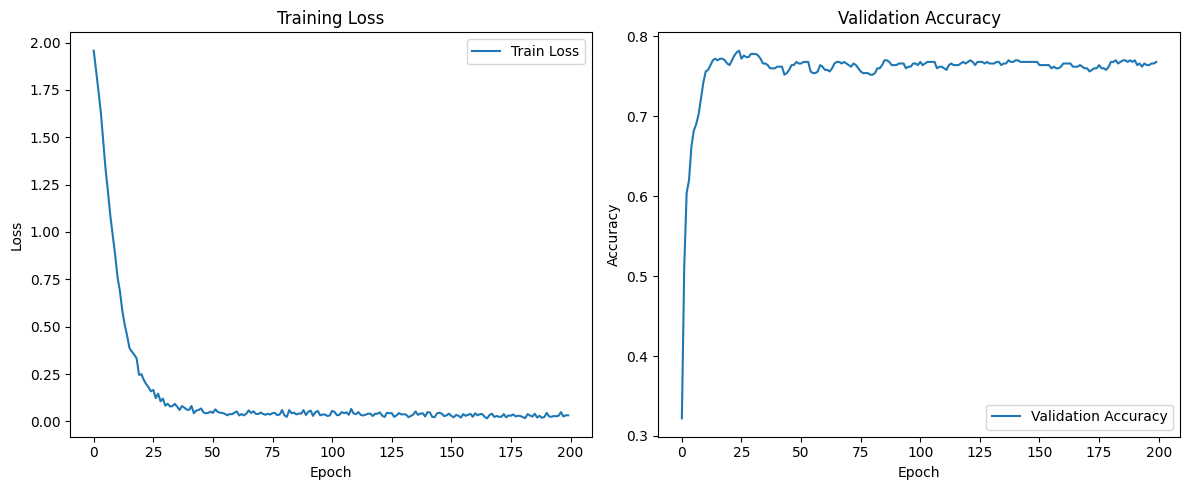

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv
from torch_geometric.loader import DataLoader
import matplotlib.pyplot as plt

# Load the CORA dataset
dataset = Planetoid(root="./data/Cora", name="Cora")
data = dataset[0]  # Cora only has one graph

# Define the GNN model
class GNN(torch.nn.Module):
    def __init__(self):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize the model, optimizer, and loss function
model = GNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Training and validation
train_losses = []
val_accuracies = []

for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Evaluate on validation set
    model.eval()
    _, pred = model(data).max(dim=1)
    val_correct = pred[data.val_mask] == data.y[data.val_mask]
    val_acc = int(val_correct.sum()) / int(data.val_mask.sum())
    val_accuracies.append(val_acc)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1:03d}, Loss: {loss:.4f}, Val Acc: {val_acc:.4f}")

# Test accuracy
model.eval()
_, pred = model(data).max(dim=1)
test_correct = pred[data.test_mask] == data.y[data.test_mask]
test_acc = int(test_correct.sum()) / int(data.test_mask.sum())
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training loss and validation accuracy
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

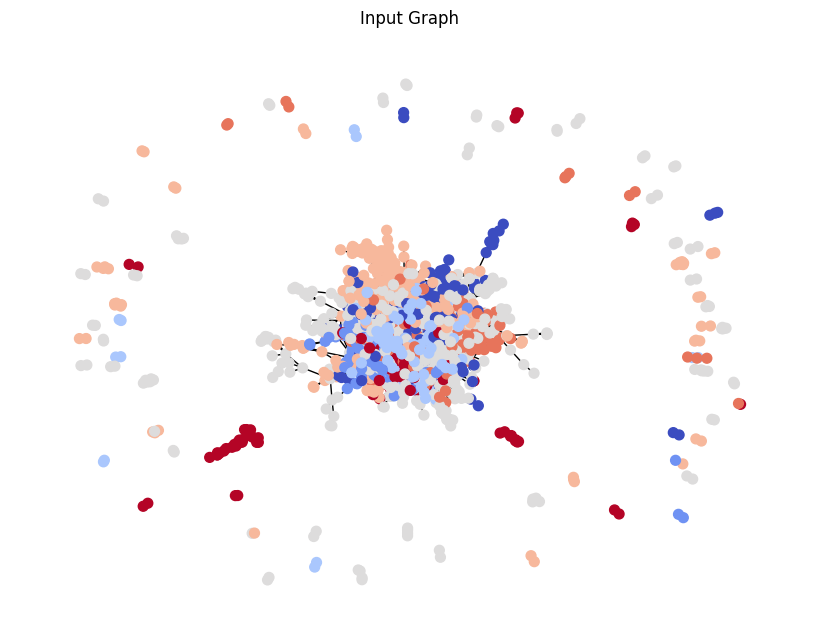

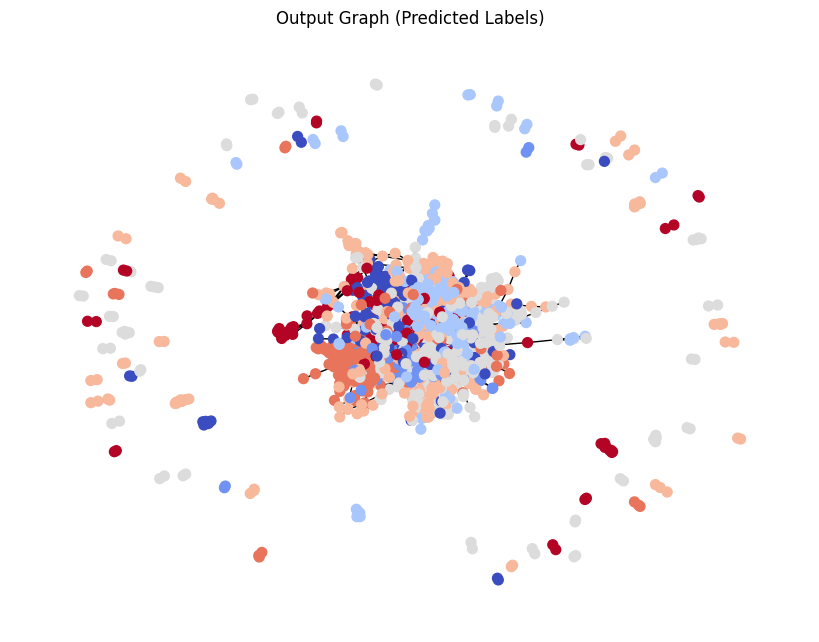

In [ ]:
import networkx as nx
from torch_geometric.utils import to_networkx

# Convert PyG data to NetworkX graph
def plot_graph(data, title):
    G = to_networkx(data, to_undirected=True)
    plt.figure(figsize=(8, 6))
    nx.draw(G, with_labels=False, node_color=data.y, cmap="coolwarm", node_size=50)
    plt.title(title)
    plt.show()

# Plot input graph
plot_graph(data, "Input Graph")

# Get node embeddings after passing through the model
model.eval()
with torch.no_grad():
    out = model(data).argmax(dim=1)  # Predicted labels

# Assign predicted labels as node colors and plot output graph
data_pred = data.clone()
data_pred.y = out  # Replace ground truth labels with predictions
plot_graph(data_pred, "Output Graph (Predicted Labels)")


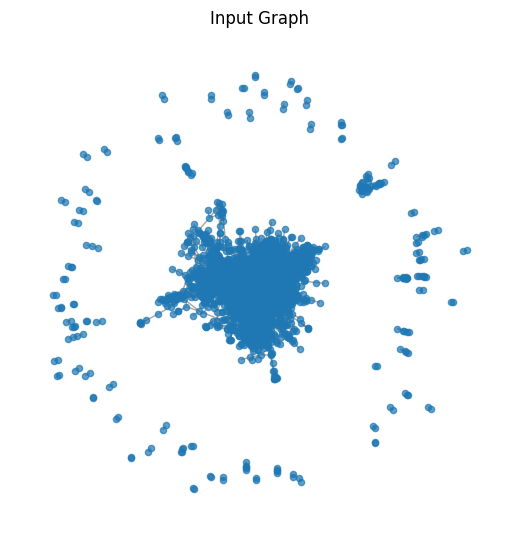

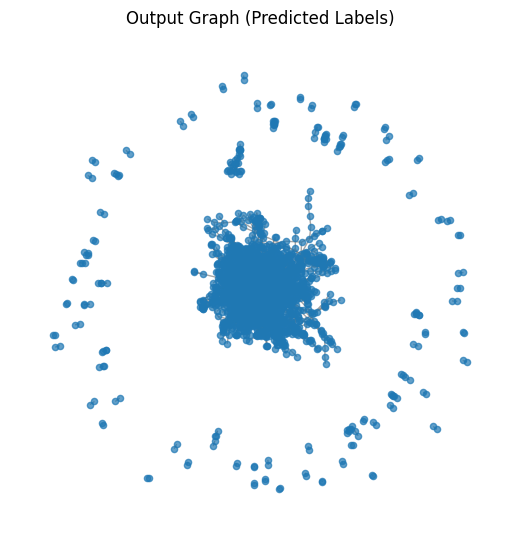

In [ ]:
import networkx as nx
from torch_geometric.utils import to_networkx

# Function to plot a small, clear graph
def plot_simple_graph(data, title):
    G = to_networkx(data, to_undirected=True)
    plt.figure(figsize=(5, 5))  # Smaller figure
    nx.draw(G, node_size=20, edge_color="gray", alpha=0.7, with_labels=False)
    plt.title(title)
    plt.show()

# Plot input and output graphs
plot_simple_graph(data, "Input Graph")
model.eval()
with torch.no_grad():
    data.y = model(data).argmax(dim=1)  # Replace labels with predictions
plot_simple_graph(data, "Output Graph (Predicted Labels)")
